In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import os
import openpyxl
import seaborn as sns

pd.set_option("display.min_rows", 10)

In [2]:
class GetDataFrame:
    EQUIPMENT_LIST = ("CW500Viewer", "equip2")

    def __init__(self, equip_model: str, file_path: str):
        if equip_model not in self.EQUIPMENT_LIST:
            raise ValueError(f"equip_model must be one of {self.EQUIPMENT_LIST}. Got: {equip_model}")

        self.equip_model = equip_model
        self.file_path = file_path
        self.df = None  

    def load(self) -> pd.DataFrame:
        if self.equip_model == "CW500Viewer":
            self.df = self._get_and_clean_cw500_df()
            return self.df
            
        elif self.equip_model == "equip2":
            self.df = self._get_and_clean_equip2_df()
            return self.df
  
        raise ValueError(f"Unsupported equip_model: {self.equip_model}")

    def _get_and_clean_cw500_df(self) -> pd.DataFrame:
        df = pd.read_csv(self.file_path, sep=';', decimal=',', skiprows=37)

        rename_map = {
            'MIN_V1[V][V]': 'Van_min', 'MIN_V2[V][V]': 'Vbn_min', 'MIN_V3[V][V]': 'Vcn_min',
            'AVG_V1[V][V]': 'Van_avg', 'AVG_V2[V][V]': 'Vbn_avg', 'AVG_V3[V][V]': 'Vcn_avg',
            'MAX_V1[V][V]': 'Van_max', 'MAX_V2[V][V]': 'Vbn_max', 'MAX_V3[V][V]': 'Vcn_max',
            
        }
        df = df.rename(columns=rename_map)

        cols = ['DateTime', 'Van_min', 'Vbn_min', 'Vcn_min', 'Van_avg', 'Vbn_avg', 'Vcn_avg', 'Van_max', 'Vbn_max', 'Vcn_max']
    
        df = df[cols]
        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%Y/%m/%d %H:%M:%S")

        num_cols = cols[1:]
        df[num_cols] = df[num_cols].astype(float)

        return df

    def _get_and_clean_equip2_df(self) -> pd.DataFrame:
        df = pd.read_excel(path)
        if "Registro" in df.columns:
            df = df.rename(columns={'Registro': 'DateTime'})
        elif "time" in df.columns:
            df = df.rename(columns={'time': 'DateTime'})

        rename_map = {
            'Van min [V]': 'Van_min', 'Vbn min [V]': 'Vbn_min', 'Vcn min [V]': 'Vcn_min',
            'Van avg [V]': 'Van_avg', 'Vbn avg [V]': 'Vbn_avg', 'Vcn avg [V]': 'Vcn_avg',
            'Van max [V]': 'Van_max', 'Vbn max [V]': 'Vbn_max', 'Vcn max [V]': 'Vcn_max'
        }
        df = df.rename(columns=rename_map)

        mask = df.map(lambda x: isinstance(x, str)).any(axis=1)
        df = df[~mask].reset_index(drop=True)
        
        cols = ['DateTime', 'Van_min', 'Vbn_min', 'Vcn_min', 'Van_avg', 'Vbn_avg', 'Vcn_avg', 'Van_max', 'Vbn_max', 'Vcn_max']
        df = df[cols]

        df["DateTime"] = pd.to_datetime(df["DateTime"], format="%Y/%m/%d %H:%M:%S")
        num_cols = cols[1:]
        df[num_cols] = df[num_cols].astype(float)
        
        return df

In [3]:
equip_model = 'CW500Viewer'

In [4]:
if equip_model == 'CW500Viewer':
    _dir = r"..\00_data\CW500Viewer\0_data_TR_DT_DC_PST_FP"
    files = [file for file in os.listdir(_dir) if file.endswith(".csv")]
elif equip_model == "equip2":
    _dir = r"..\00_data\Arquivos_CD_Rennner\CD_Rennner_files"
    files = [file for file in os.listdir(_dir) if file.endswith(".xlsx")]

list(zip(list(range(len(files))),files))

[(0, 'dados_qgbt2_INPS0014.csv'),
 (1, 'dados_qgbt3_INPS0013.csv'),
 (2, 'dados_qgbt4_INPS0011.csv')]

In [5]:
path = os.path.join(_dir, files[2])
path

'..\\00_data\\CW500Viewer\\0_data_TR_DT_DC_PST_FP\\dados_qgbt4_INPS0011.csv'

In [6]:
df = GetDataFrame(equip_model, path).load()
df

,DateTime,Van_min,Vbn_min,Vcn_min,Van_avg,Vbn_avg,Vcn_avg,Van_max,Vbn_max,Vcn_max
0,2023-02-08 14:56:52,222.8,221.9,223.2,224.9,224.2,228.2,225.8,225.2,229.6
1,2023-02-08 15:06:52,225.2,224.8,229.0,225.8,225.5,229.6,227.0,226.4,230.6
2,2023-02-08 15:16:52,226.5,225.7,230.0,227.3,226.5,230.7,228.2,227.1,231.4
3,2023-02-08 15:26:52,227.0,225.9,230.1,228.0,227.2,231.3,228.7,228.3,232.1
4,2023-02-08 15:36:52,228.1,227.5,231.3,229.1,228.7,232.7,229.7,229.1,233.3
...,...,...,...,...,...,...,...,...,...,...
1154,2023-02-16 15:16:52,224.2,224.1,227.4,225.2,224.9,228.5,225.9,225.5,229.2
1155,2023-02-16 15:26:52,225.1,224.6,227.7,226.2,225.7,229.3,227.6,226.9,230.8
1156,2023-02-16 15:36:52,226.7,226.4,229.8,227.7,227.7,230.9,228.5,228.9,231.8
1157,2023-02-16 15:46:52,226.2,226.1,230.1,228.0,228.2,231.5,228.5,228.7,232.1


# Define Parameters

In [7]:
Limits_220V = {
    "P_inf": 202,
    "P_sup": 231,
    "C_inf": 191,
    "C_sup": 233,
}

Indicator_Limits = {
    "DRP": 3.0,
    "DRC": 0.5,
}

Workday = {
    "H_DAY": dt.time(7, 0, 0),
    "H_PEAK": dt.time(18, 0, 0),
    "H_EVENING": dt.time(21, 0, 0),
    "H_NIGHT": dt.time(23, 59, 59),
}

weekdays = {
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}

# Create DF with just 1008 measurement points

In [8]:
data_VSS = df.iloc[0:1008].copy()
data_VSS["Weekday"] = data_VSS["DateTime"].dt.weekday
data_VSS["Weekday_EN"] = data_VSS["Weekday"].map(weekdays)

# --------- Determine time period (using dict)
data_VSS["Time_Type"] = [
    "Day: 07h-18h" if (t >= Workday["H_DAY"]) and (t < Workday["H_PEAK"]) else
    "Peak: 18h-21h" if (t >= Workday["H_PEAK"]) and (t < Workday["H_EVENING"]) else
    "Night: 21h-00h" if (t >= Workday["H_EVENING"]) and (t < Workday["H_NIGHT"]) else
    "Early_Morning: 00h-07h"
    for t in data_VSS["DateTime"].dt.time
]

data_VSS

,DateTime,Van_min,Vbn_min,Vcn_min,Van_avg,Vbn_avg,Vcn_avg,Van_max,Vbn_max,Vcn_max,Weekday,Weekday_EN,Time_Type
0,2023-02-08 14:56:52,222.8,221.9,223.2,224.9,224.2,228.2,225.8,225.2,229.6,2,Wednesday,Day: 07h-18h
1,2023-02-08 15:06:52,225.2,224.8,229.0,225.8,225.5,229.6,227.0,226.4,230.6,2,Wednesday,Day: 07h-18h
2,2023-02-08 15:16:52,226.5,225.7,230.0,227.3,226.5,230.7,228.2,227.1,231.4,2,Wednesday,Day: 07h-18h
3,2023-02-08 15:26:52,227.0,225.9,230.1,228.0,227.2,231.3,228.7,228.3,232.1,2,Wednesday,Day: 07h-18h
4,2023-02-08 15:36:52,228.1,227.5,231.3,229.1,228.7,232.7,229.7,229.1,233.3,2,Wednesday,Day: 07h-18h
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,2023-02-15 14:06:52,221.3,220.3,224.8,223.1,222.3,226.5,223.7,223.1,227.1,2,Wednesday,Day: 07h-18h
1004,2023-02-15 14:16:52,222.5,221.3,225.6,223.0,222.1,226.4,223.6,222.8,227.2,2,Wednesday,Day: 07h-18h
1005,2023-02-15 14:26:52,222.6,221.6,226.2,223.6,222.5,226.9,224.3,223.2,227.5,2,Wednesday,Day: 07h-18h
1006,2023-02-15 14:36:52,222.8,221.8,225.6,223.4,222.3,226.7,223.9,222.9,227.0,2,Wednesday,Day: 07h-18h


# Voltage Graph

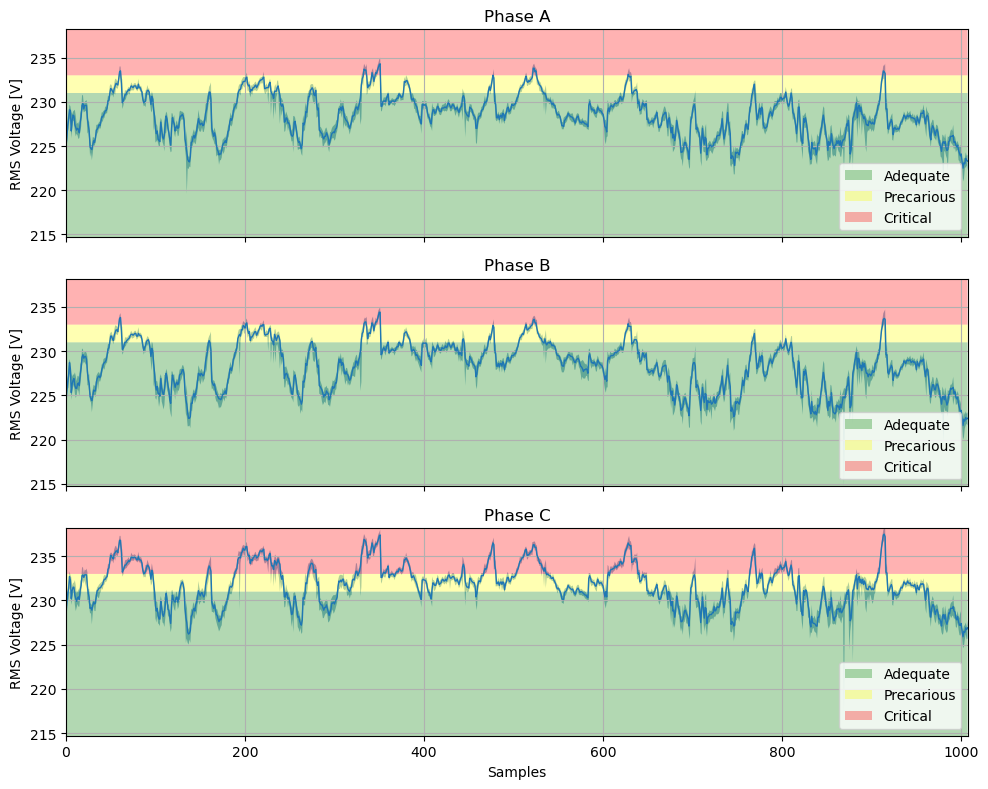

In [9]:
# --------- Generate steady-state voltage plots
Nsteps = 1008
t = np.arange(Nsteps)
x = np.ones(Nsteps)

# Limits from dict (instead of class attributes)
limit_precarious_sup = Limits_220V["P_sup"] * x
limit_precarious_inf = Limits_220V["P_inf"] * x
limit_critical_sup = Limits_220V["C_sup"] * x
limit_critical_inf = Limits_220V["C_inf"] * x

# Optional absolute "critical" bounds used in your plot shading
limit_critical_max = 240 * x
limit_critical_min = 185 * x

# Y-axis bounds based on measured min/max across phases
Y_plot_max = max(
    data_VSS["Van_max"].max(),
    data_VSS["Vbn_max"].max(),
    data_VSS["Vcn_max"].max(),
)
Y_plot_min = min(
    data_VSS["Van_min"].min(),
    data_VSS["Vbn_min"].min(),
    data_VSS["Vcn_min"].min(),
)

def edit_voltage_plot(ax, V_max, V_min, V_avg, phase):
    ax.grid(True)

    # Measured envelope + average
    ax.fill_between(t, V_max, V_min, alpha=0.5, linewidth=0)
    ax.plot(t, V_avg, linewidth=1)

    # Regions (same shading logic as your original)
    ax.fill_between(t, limit_precarious_sup, limit_precarious_inf, fc="green", alpha=0.3, label="Adequate")       
    ax.fill_between(t, limit_critical_sup, limit_precarious_sup,  fc="yellow", alpha=0.3, label="Precarious")             
    ax.fill_between(t, limit_critical_inf, limit_precarious_inf, fc="yellow", alpha=0.3)             
    ax.fill_between(t, limit_critical_inf, limit_critical_min, fc="red", alpha=0.3, label="Critical")        
    ax.fill_between(t, limit_critical_sup, limit_critical_max, fc="red", alpha=0.3)
                    
    ax.set_ylim([Y_plot_min, Y_plot_max])
    ax.set_xlim([0, Nsteps])
    ax.set_ylabel("RMS Voltage [V]")
    ax.set_title(f"Phase {phase}")
    ax.legend(loc="lower right")


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 8))

edit_voltage_plot(ax1, data_VSS["Van_max"], data_VSS["Van_min"], data_VSS["Van_avg"], "A")
edit_voltage_plot(ax2, data_VSS["Vbn_max"], data_VSS["Vbn_min"], data_VSS["Vbn_avg"], "B")
edit_voltage_plot(ax3, data_VSS["Vcn_max"], data_VSS["Vcn_min"], data_VSS["Vcn_avg"], "C")

ax3.set_xlabel("Samples")
plt.tight_layout()
plt.show()

# Counts

In [10]:
# total number of precarious
def count_tnp(series, limits):
    return (
        ((series < limits["P_inf"]) & (series >= limits["C_inf"])) |
        ((series > limits["P_sup"]) & (series <= limits["C_sup"]))
    ).sum()

In [11]:
TNP_Min = {
    "Phase_A": count_tnp(data_VSS["Van_min"], Limits_220V),
    "Phase_B": count_tnp(data_VSS["Vbn_min"], Limits_220V),
    "Phase_C": count_tnp(data_VSS["Vcn_min"], Limits_220V),
}
TNP_Avg = {
    "Phase_A": count_tnp(data_VSS["Van_avg"], Limits_220V),
    "Phase_B": count_tnp(data_VSS["Vbn_avg"], Limits_220V),
    "Phase_C": count_tnp(data_VSS["Vcn_avg"], Limits_220V),
}
TNP_Max = {
    "Phase_A": count_tnp(data_VSS["Van_max"], Limits_220V),
    "Phase_B": count_tnp(data_VSS["Vbn_max"], Limits_220V),
    "Phase_C": count_tnp(data_VSS["Vcn_max"], Limits_220V),
}

TNP_table = pd.DataFrame(
    [TNP_Min, TNP_Avg, TNP_Max],
    index=["Min", "Avg", "Max"]
)
TNP_table

,Phase_A,Phase_B,Phase_C
Min,106,118,297
Avg,149,150,347
Max,173,183,356


In [12]:
# total number of criticals
def count_tnc(series, limits):
    return (
        (series < limits["C_inf"]) |
        (series > limits["C_sup"])
    ).sum()

In [13]:
TNC_Min = {
    "Phase_A": count_tnc(data_VSS["Van_min"], Limits_220V),
    "Phase_B": count_tnc(data_VSS["Vbn_min"], Limits_220V),
    "Phase_C": count_tnc(data_VSS["Vcn_min"], Limits_220V),
}

TNC_Avg = {
    "Phase_A": count_tnc(data_VSS["Van_avg"], Limits_220V),
    "Phase_B": count_tnc(data_VSS["Vbn_avg"], Limits_220V),
    "Phase_C": count_tnc(data_VSS["Vcn_avg"], Limits_220V),
}

TNC_Max = {
    "Phase_A": count_tnc(data_VSS["Van_max"], Limits_220V),
    "Phase_B": count_tnc(data_VSS["Vbn_max"], Limits_220V),
    "Phase_C": count_tnc(data_VSS["Vcn_max"], Limits_220V),
}

TNC_table = pd.DataFrame(
    [TNC_Min, TNC_Avg, TNC_Max],
    index=["Min", "Avg", "Max"]
)

TNC_table

,Phase_A,Phase_B,Phase_C
Min,7,7,214
Avg,20,22,284
Max,38,50,373


# Calculation of the DTC and DTP indicators

In [14]:
def calculate_duration_index_with_phase(table, total_samples=1008):
    """
    table: DataFrame with index [Min, Avg, Max]
           and columns [Phase_A, Phase_B, Phase_C]
    """
    worst_value = table.max(axis=1)
    worst_phase = table.idxmax(axis=1)

    duration_index = (worst_value / total_samples * 100).round(2)

    return duration_index, worst_phase


In [15]:
DTP_value, DTP_phase = calculate_duration_index_with_phase(TNP_table)
DTC_value, DTC_phase = calculate_duration_index_with_phase(TNC_table)

duration_index_table = pd.DataFrame({
    "DTP (%)": DTP_value,
    "DTP Worst Phase": DTP_phase,
    "DTC (%)": DTC_value,
    "DTC Worst Phase": DTC_phase,
})
duration_index_table

,DTP (%),DTP Worst Phase,DTC (%),DTC Worst Phase
Min,29.46,Phase_C,21.23,Phase_C
Avg,34.42,Phase_C,28.17,Phase_C
Max,35.32,Phase_C,37.00,Phase_C


In [16]:
# --- Masks (boolean only, no summation) ---
def tnp_mask(series, limits):
    return (
        ((series < limits["P_inf"]) & (series >= limits["C_inf"])) |
        ((series > limits["P_sup"]) & (series <= limits["C_sup"]))
    )

def tnc_mask(series, limits):
    return (series < limits["C_inf"]) | (series > limits["C_sup"])

def worst_voltage_column(duration_index, worst_phase_series):
    """
    duration_index: Series com índice ['Min','Avg','Max'] e valores numéricos (ex: DTP_value)
    worst_phase_series: Series com índice ['Min','Avg','Max'] e valores 'Phase_A/B/C' (ex: DTP_phase)
    """
    worst_stat = duration_index.idxmax()                # 'Min' ou 'Avg' ou 'Max'
    phase_label = worst_phase_series.loc[worst_stat]    # 'Phase_A'/'Phase_B'/'Phase_C'
    phase_letter = phase_label.split("_")[-1].lower()   # 'a'/'b'/'c'
    col = f"V{phase_letter}n_{worst_stat.lower()}"      # 'Van_min'/'Vbn_avg'/...

    return worst_stat, col

# --- Generic grouped occurrence counter ---
def occurrence_by_group(df, value_col, group_col, mask_func, limits, out_col, order=None):
    mask = mask_func(df[value_col], limits)
    s = df.loc[mask].groupby(group_col).size()

    if order is not None:
        s = s.reindex(order, fill_value=0)

    return s.to_frame(out_col)

def build_occurrence_tables(
    df,
    DTP_value, DTP_phase,
    DTC_value, DTC_phase,
    limits,
    col_time="Time_Type",
    col_week_num="Weekday",
    col_week_en="Weekday_EN"
):
    df = df.copy()

    # Ensure numeric weekday exists (0=Monday ... 6=Sunday)
    if col_week_num not in df.columns:
        df[col_week_num] = pd.to_datetime(df["DateTime"]).dt.weekday

    # Pega diretamente a coluna “pior caso”
    DTP_worst_stat, col_DTP = worst_voltage_column(DTP_value, DTP_phase)
    DTC_worst_stat, col_DTC = worst_voltage_column(DTC_value, DTC_phase)

    # Validação (opcional, mas recomendo)
    missing = [c for c in [col_DTP, col_DTC] if c not in df.columns]
    if missing:
        raise KeyError(f"Colunas não encontradas no df: {missing}")

    week_order = list(range(7))

    # --- Build tables ---
    dtp_time = occurrence_by_group(df, col_DTP, col_time, tnp_mask, limits, "DTP_Occurrence")
    dtc_time = occurrence_by_group(df, col_DTC, col_time, tnc_mask, limits, "DTC_Occurrence")

    dtp_week = occurrence_by_group(df, col_DTP, col_week_num, tnp_mask, limits, "DTP_Occurrence", order=week_order)
    dtc_week = occurrence_by_group(df, col_DTC, col_week_num, tnc_mask, limits, "DTC_Occurrence", order=week_order)

    # Add weekday name as auxiliary column
    if col_week_en in df.columns:
        weekday_map = (
            df[[col_week_num, col_week_en]]
            .drop_duplicates()
            .set_index(col_week_num)[col_week_en]
        )
    else:
        weekday_map = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}

    dtp_week = dtp_week.assign(Weekday_EN=dtp_week.index.map(weekday_map))
    dtc_week = dtc_week.assign(Weekday_EN=dtc_week.index.map(weekday_map))

    return {
        "DTP_time": dtp_time,
        "DTC_time": dtc_time,
        "DTP_week": dtp_week,
        "DTC_week": dtc_week,
        "DTP_worst_stat": DTP_worst_stat,
        "DTC_worst_stat": DTC_worst_stat,
        "DTP_worst_column": col_DTP,
        "DTC_worst_column": col_DTC,
    }


In [17]:
out = build_occurrence_tables(
    data_VSS,
    DTP_value=DTP_value, DTP_phase=DTP_phase,
    DTC_value=DTC_value, DTC_phase=DTC_phase,
    limits=Limits_220V
)

print(f"***** DTP Occurrence by Time Period (Worst Case Column: {out['DTP_worst_column']}) *****")
display(out["DTP_time"])

print(f"\n***** DTC Occurrence by Time Period (Worst Case Column: {out['DTC_worst_column']}) *****")
display(out["DTC_time"])

print(f"\n***** DTP Occurrence by Weekday (Worst Case Column: {out['DTP_worst_column']}) *****")
display(out["DTP_week"])

print(f"\n***** DTC Occurrence by Weekday (Worst Case Column: {out['DTC_worst_column']}) *****")
display(out["DTC_week"])


***** DTP Occurrence by Time Period (Worst Case Column: Vcn_max) *****


,DTP_Occurrence
Time_Type,
Day: 07h-18h,175
Early_Morning: 00h-07h,85
Night: 21h-00h,36
Peak: 18h-21h,60



***** DTC Occurrence by Time Period (Worst Case Column: Vcn_max) *****


,DTC_Occurrence
Time_Type,
Day: 07h-18h,57
Early_Morning: 00h-07h,197
Night: 21h-00h,90
Peak: 18h-21h,29



***** DTP Occurrence by Weekday (Worst Case Column: Vcn_max) *****


,DTP_Occurrence,Weekday_EN
Weekday,,
0,41,Monday
1,59,Tuesday
2,69,Wednesday
3,24,Thursday
4,29,Friday
5,70,Saturday
6,64,Sunday



***** DTC Occurrence by Weekday (Worst Case Column: Vcn_max) *****


,DTC_Occurrence,Weekday_EN
Weekday,,
0,33,Monday
1,42,Tuesday
2,17,Wednesday
3,62,Thursday
4,77,Friday
5,71,Saturday
6,71,Sunday


# Charts

In [18]:
def pie_percent_from_counts(
    df,
    count_col,
    title,
    label_col=None,
    ax=None,
    startangle=90,
    figsize=(5, 5),
    show_legend=True,
    legend_title="Category",
    title_fontsize=16,
    title_pad=10,
):
    """
    Plots a percentage pie chart using the same visual style
    as create_pie_chart_by_time_type_sns.
    """

    sns.set_theme(style="white")

    if ax is None:
        _, ax = plt.subplots(figsize=figsize)

    s = df[count_col].copy()

    if label_col is not None and label_col in df.columns:
        s.index = df[label_col].astype(str).values
    else:
        s.index = s.index.astype(str)

    s = s[s > 0]

    if s.empty:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", fontsize=12)
        ax.set_title(title, fontsize=title_fontsize, pad=title_pad)
        ax.axis("off")
        return ax

    # Ordenar em ordem decrescente
    s = s.sort_values(ascending=False)

    values = s.values
    labels = s.index.tolist()
    total = values.sum()
    percentages = values / total * 100

    legend_labels = [
        f"{label} ({pct:.1f}%)"
        for label, pct in zip(labels, percentages)
    ]

    colors = sns.color_palette("tab10", len(values))

    wedges = ax.pie(
        values,
        labels=None,                # nada dentro da pizza
        startangle=startangle,
        counterclock=False,
        colors=colors,
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
    )[0]

    ax.axis("equal")
    ax.set_title(title, fontsize=title_fontsize, pad=title_pad)

    if show_legend:
        ax.legend(
            wedges,
            legend_labels,
            title=legend_title,
            loc="center left",
            bbox_to_anchor=(1.05, 0.5),
            frameon=False,
        )

    plt.tight_layout()
    return ax


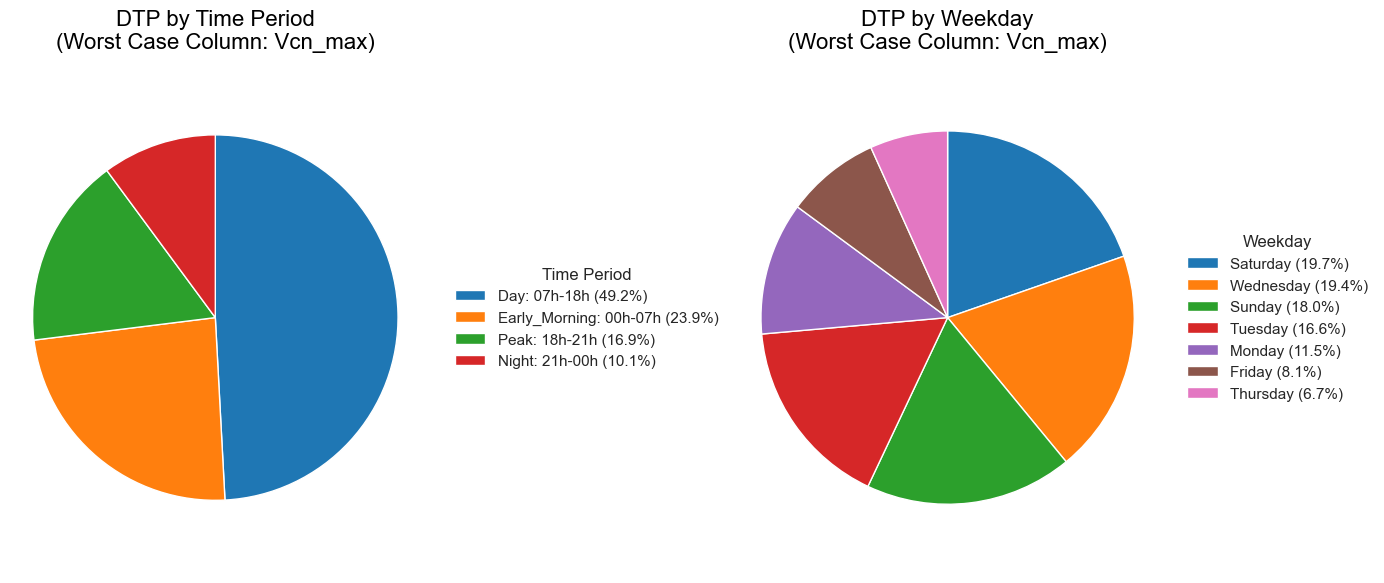

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

pie_percent_from_counts(
    df=out["DTP_time"],
    count_col="DTP_Occurrence",
    title=f"DTP by Time Period\n(Worst Case Column: {out['DTP_worst_column']})",
    ax=axes[0],
    show_legend=True,
    legend_title="Time Period",
    title_fontsize=16,
    title_pad=10,
)

pie_percent_from_counts(
    df=out["DTP_week"],
    count_col="DTP_Occurrence",
    label_col="Weekday_EN",
    title=f"DTP by Weekday\n(Worst Case Column: {out['DTP_worst_column']})",
    ax=axes[1],
    show_legend=True,
    legend_title="Weekday",
    title_fontsize=16,
    title_pad=10,
)

plt.tight_layout()
plt.show()


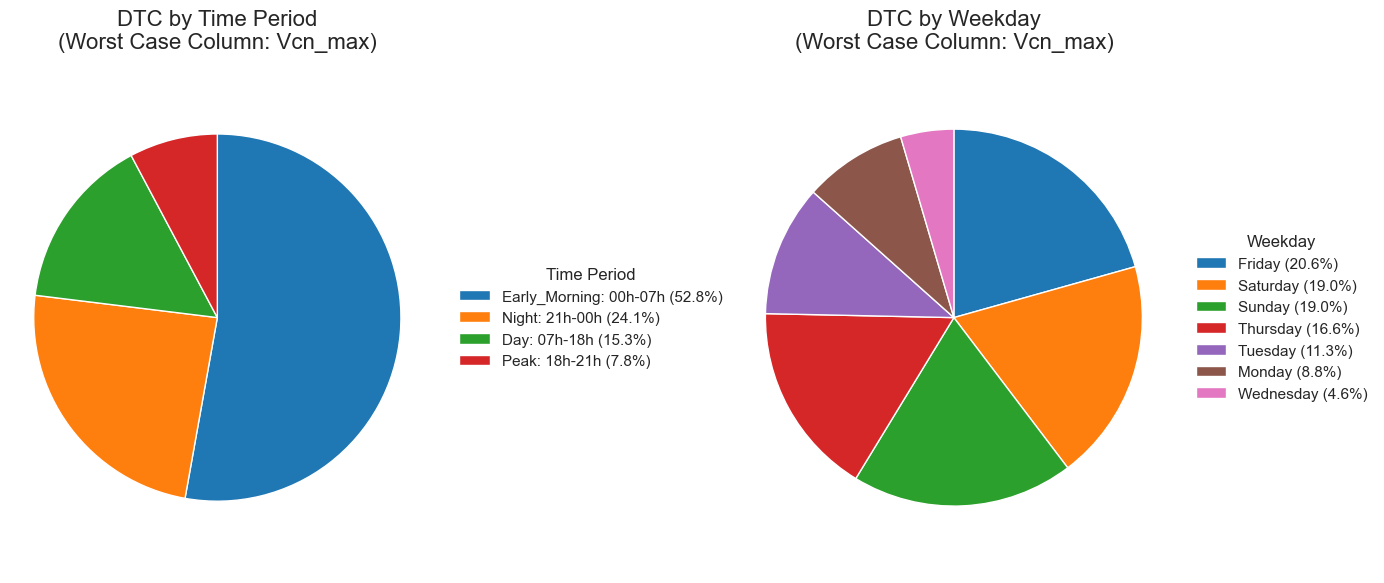

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

pie_percent_from_counts(
    df=out["DTC_time"],
    count_col="DTC_Occurrence",
    title=f"DTC by Time Period\n(Worst Case Column: {out['DTC_worst_column']})",
    ax=axes[0],
    show_legend=True,
    legend_title="Time Period",
    title_fontsize=16,
    title_pad=10,
)

pie_percent_from_counts(
    df=out["DTC_week"],
    count_col="DTC_Occurrence",
    label_col="Weekday_EN",
    title=f"DTC by Weekday\n(Worst Case Column: {out['DTC_worst_column']})",
    ax=axes[1],
    show_legend=True,
    legend_title="Weekday",
    title_fontsize=16,
    title_pad=10,
)

plt.tight_layout()
plt.show()
